In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/work/pi_mrobson_smith_edu/mothitor/code_main/efficientnet_data/reshape_pass_5/detections.csv')

In [3]:
df

,image_name,detection_score,label,xmin,ymin,xmax,ymax
0,ama_2024-06-14_21_00_03.jpg,0.663556,not_moth,4420,1420,4611,1623
1,ama_2024-06-14_21_00_03.jpg,0.254534,not_moth,2,5672,525,6241
2,ama_2024-06-14_21_10_03_extra.jpg,0.748756,not_moth,1260,5303,1705,5770
3,ama_2024-06-14_21_10_03_extra.jpg,0.261633,not_moth,1,5672,523,6238
4,ama_2024-06-14_21_20_03_extra.jpg,0.757901,not_moth,2763,4445,3047,5021
...,...,...,...,...,...,...,...
10419,syd_2024-10-21_23_58_03.jpg,0.251432,not_moth,20,5794,9097,6930
10420,syd_2024-10-21_23_58_03.jpg,0.248276,not_moth,8687,5644,9145,5953
10421,syd_2024-10-21_23_58_03.jpg,0.226328,moth,6118,3588,6197,3710
10422,syd_2024-10-21_23_58_03.jpg,0.218116,not_moth,637,5977,8901,6933


In [4]:
#parse from image_name year, month, day, and  time
df['year'] = df['image_name'].str.split('_').str[1]
#rest of string is time
df['time'] = df['image_name'].str.split('_').str[2] + '_' + df['image_name'].str.split('_').str[3] + '_' + df['image_name'].str.split('_').str[4]
#remove .jpg
df['time'] = df['time'].str.replace('.jpg', '')

In [5]:
df

,image_name,detection_score,label,xmin,ymin,xmax,ymax,year,time
0,ama_2024-06-14_21_00_03.jpg,0.663556,not_moth,4420,1420,4611,1623,2024-06-14,21_00_03
1,ama_2024-06-14_21_00_03.jpg,0.254534,not_moth,2,5672,525,6241,2024-06-14,21_00_03
2,ama_2024-06-14_21_10_03_extra.jpg,0.748756,not_moth,1260,5303,1705,5770,2024-06-14,21_10_03
3,ama_2024-06-14_21_10_03_extra.jpg,0.261633,not_moth,1,5672,523,6238,2024-06-14,21_10_03
4,ama_2024-06-14_21_20_03_extra.jpg,0.757901,not_moth,2763,4445,3047,5021,2024-06-14,21_20_03
...,...,...,...,...,...,...,...,...,...
10419,syd_2024-10-21_23_58_03.jpg,0.251432,not_moth,20,5794,9097,6930,2024-10-21,23_58_03
10420,syd_2024-10-21_23_58_03.jpg,0.248276,not_moth,8687,5644,9145,5953,2024-10-21,23_58_03
10421,syd_2024-10-21_23_58_03.jpg,0.226328,moth,6118,3588,6197,3710,2024-10-21,23_58_03
10422,syd_2024-10-21_23_58_03.jpg,0.218116,not_moth,637,5977,8901,6933,2024-10-21,23_58_03


In [23]:
#find the counts of time
df['time'].value_counts()
#save as dictionary
time_img = df['time'].value_counts().to_dict()
# time_counts = df['time'].value_counts().to_dict()

In [24]:
df_counts = df.groupby(['image_name','time']).size().to_frame(name='counts')
#save image_nameand time as counts
df_counts = df_counts.reset_index()

In [25]:
df_counts

,image_name,time,counts
0,ama_2024-06-14_21_00_03.jpg,21_00_03,2
1,ama_2024-06-14_21_10_03_extra.jpg,21_10_03,2
2,ama_2024-06-14_21_20_03_extra.jpg,21_20_03,5
3,ama_2024-06-14_21_30_03.jpg,21_30_03,6
4,ama_2024-06-14_21_40_03_extra.jpg,21_40_03,3
...,...,...,...
1280,syd_2024-10-21_23_20_03_extra.jpg,23_20_03,3
1281,syd_2024-10-21_23_30_03.jpg,23_30_03,4
1282,syd_2024-10-21_23_40_03_extra.jpg,23_40_03,7
1283,syd_2024-10-21_23_50_03_extra.jpg,23_50_03,7


In [26]:
#write this to csv
df_counts.to_csv('/work/pi_mrobson_smith_edu/mothitor/code_main/efficientnet_data/reshape_pass_5/detections_metadata.csv', index=False)

In [27]:
#find average detections per time
time_counts= df_counts.groupby(['time']).mean(numeric_only=True)

In [28]:
time_counts = time_counts.reset_index()

In [29]:
#reformat time column with : instead of _
time_counts['time'] = time_counts['time'].str.replace('_', ':')

In [30]:
time_counts

,time,counts
0,21:00:02,4.000000
1,21:00:03,5.096154
2,21:00:04,4.500000
3,21:10:03,5.402985
4,21:10:04,4.000000
5,21:20:03,5.885246
6,21:20:04,4.833333
7,21:30:03,7.062500
8,21:30:04,5.000000
9,21:40:03,6.854839


In [42]:
imgData = pd.read_csv("/work/pi_mrobson_smith_edu/mothitor/code_main/efficientnet_data/imgData.csv")

In [49]:
#find counts by time
time_counts_img = imgData.groupby(['Time']).size().to_frame(name='counts')
#remove 14:07:47
time_counts_img = time_counts_img[time_counts_img.index != '14:07:47']

In [56]:
time_counts_img

,counts
Time,
21:00:02,6
21:00:03,52
21:00:04,10
21:10:03,67
21:10:04,1
21:20:03,62
21:20:04,6
21:30:03,64
21:30:04,4


/scratch/login/ipykernel_120586/1487834571.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, time_counts['counts'][i], str(time_counts_img['counts'][i]), ha='center', va='bottom', fontsize=15)


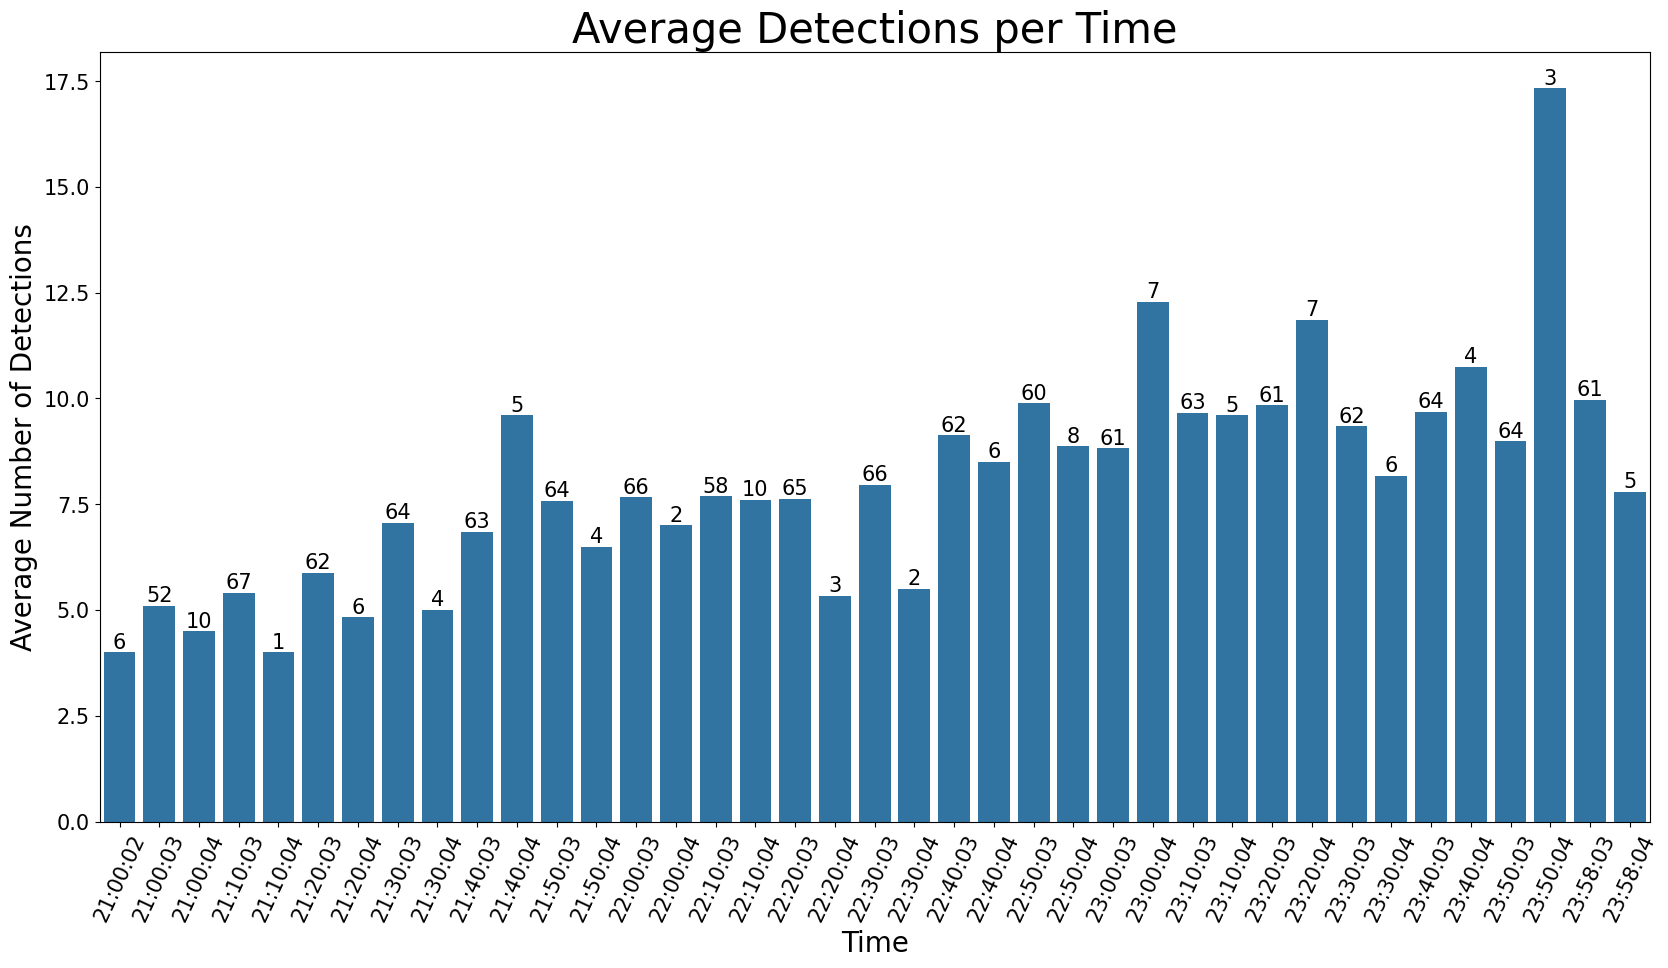

In [51]:
#put as barplot timecounts
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x='time', y='counts', data=time_counts)
plt.title('Average Detections per Time', size=30)
plt.xlabel('Time', size=20)
plt.xticks(rotation=65, size=15)
plt.ylabel('Average Number of Detections', size=20)
plt.yticks(size=15)
#on top of each bar, also put # images by time_img 
for i in range(len(time_counts)):
    plt.text(i, time_counts['counts'][i], str(time_counts_img['counts'][i]), ha='center', va='bottom', fontsize=15)


In [57]:
#avearge out deetectinos by hour and minute, but not down to second
new_counts = dict()
#rename times by hour and minute
#create time_reduced column in time_counts
time_counts['time_reduced'] = time_counts['time'].str.split(':').str[0] + ':' + time_counts['time'].str.split(':').str[1]



In [89]:
time_counts_img
#remove index
time_counts_img = time_counts_img.reset_index()

#add reduced time column
time_counts_img['time_reduced'] = time_counts_img['Time'].str.split(':').str[0] + ':' + time_counts_img['Time'].str.split(':').str[1]

In [99]:
time_counts_img
#set index to time
time_counts_img = time_counts_img.set_index('Time')

In [110]:
time_counts_img

,counts,time_reduced
Time,,
21:00:02,6,21:00
21:00:03,52,21:00
21:00:04,10,21:00
21:10:03,67,21:10
21:10:04,1,21:10
21:20:03,62,21:20
21:20:04,6,21:20
21:30:03,64,21:30
21:30:04,4,21:30


In [85]:
time_counts

,time,counts,time_reduced
0,21:00:02,4.000000,21:00
1,21:00:03,5.096154,21:00
2,21:00:04,4.500000,21:00
3,21:10:03,5.402985,21:10
4,21:10:04,4.000000,21:10
5,21:20:03,5.885246,21:20
6,21:20:04,4.833333,21:20
7,21:30:03,7.062500,21:30
8,21:30:04,5.000000,21:30
9,21:40:03,6.854839,21:40


In [113]:
detections_time_dict = dict()

In [ ]:
#multiply counts per shared time_reduced by counts in time_counts_img, and then average by sum at that time by time_counts_img
time_counts.groupby(['time_reduced'])
for time in time_counts['time_reduced'].unique():
    time_subset = time_counts[time_counts['time_reduced'] == time]
    multiplied_counts_sum = 0
    #iterate over rows
    for index, row in time_subset.iterrows():
        time_full = row['time']
        multiplied_counts_sum += row['counts'] * time_counts_img[time_counts_img.index == time_full]['counts'][0]

    #get wehre time_reduced is the time
    time_counts_img_subset = time_counts_img[time_counts_img['time_reduced'] == time]
    total_imgs = time_counts_img_subset['counts'].sum()
    print(total_imgs)
    avg_detections = multiplied_counts_sum / total_imgs
    #add to dict
    detections_time_dict[time] = avg_detections 
    print("For time: ", time, " average detections: ", avg_detections)
   

In [115]:
detections_time_dict

{'21:00': np.float64(4.911764705882353),
 '21:10': np.float64(5.382352941176471),
 '21:20': np.float64(5.792430086788814),
 '21:30': np.float64(6.9411764705882355),
 '21:40': np.float64(7.056688804554079),
 '21:50': np.float64(7.514705882352941),
 '22:00': np.float64(7.647058823529412),
 '22:10': np.float64(7.676470588235294),
 '22:20': np.float64(7.529411764705882),
 '22:30': np.float64(7.882352941176471),
 '22:40': np.float64(9.073529411764707),
 '22:50': np.float64(9.76296111665005),
 '23:00': np.float64(9.176470588235293),
 '23:10': np.float64(9.661764705882353),
 '23:20': np.float64(10.044117647058824),
 '23:30': np.float64(9.235294117647058),
 '23:40': np.float64(9.745331465919701),
 '23:50': np.float64(9.35820895522388),
 '23:58': np.float64(9.803030303030303)}

In [118]:
#for x, append :__ to each time
x = list(detections_time_dict.keys())
x = [i + ':__' for i in x]

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

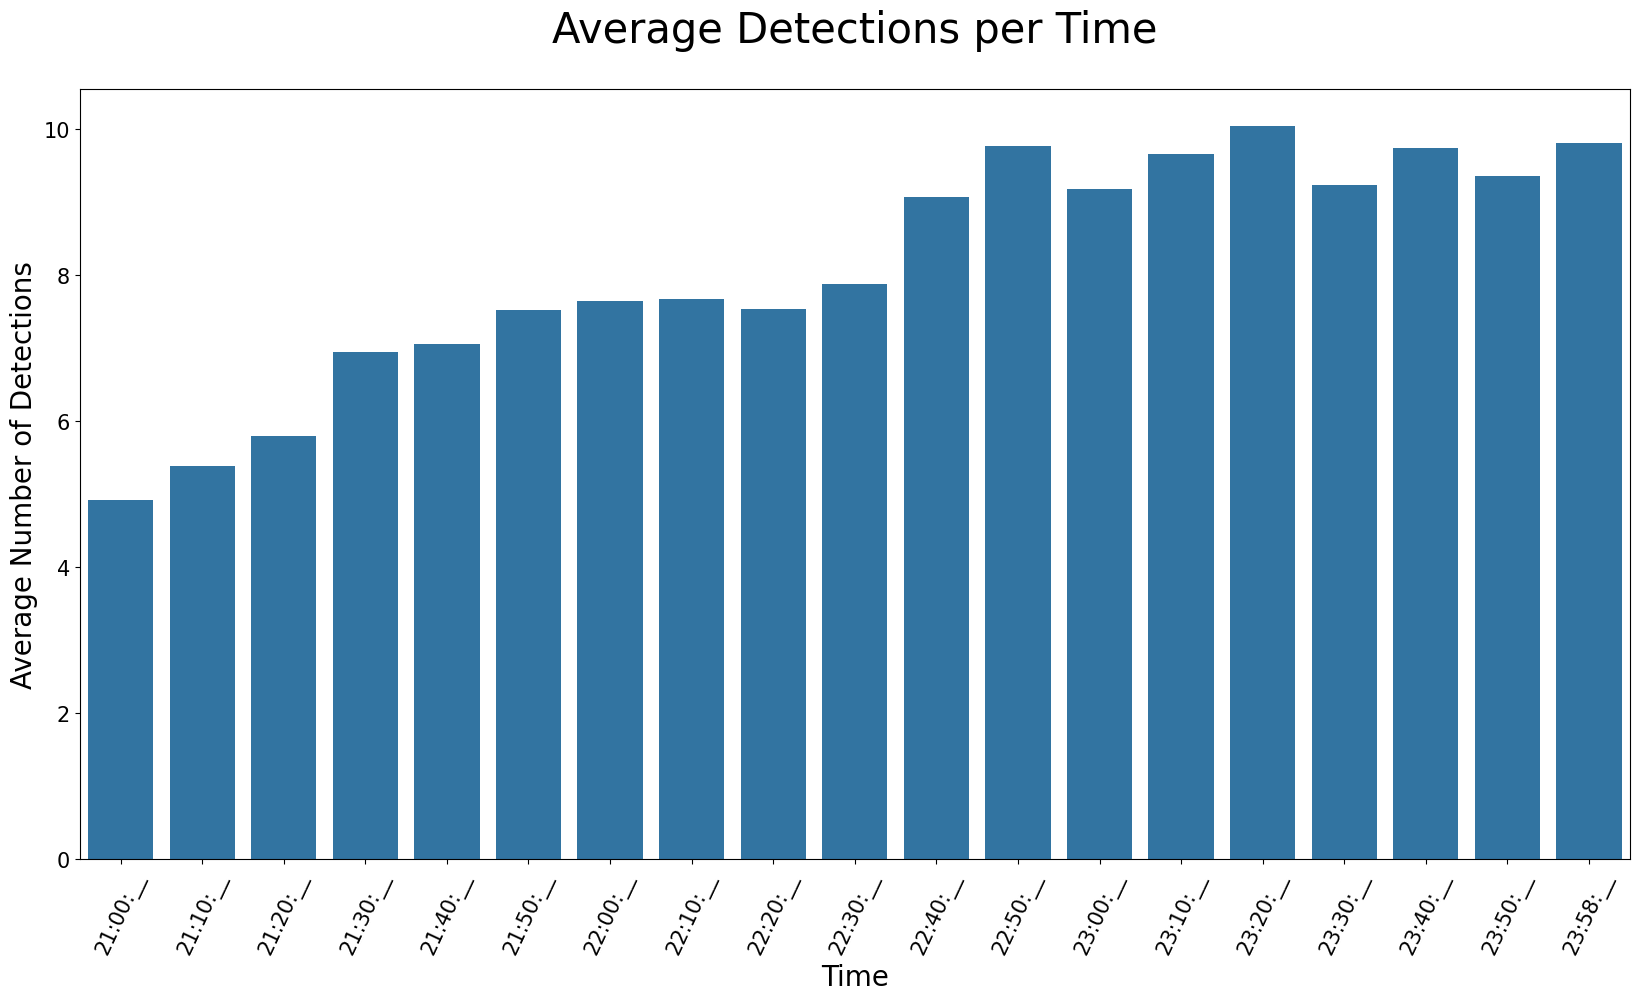

In [119]:
#plot this
plt.figure(figsize=(20,10))
#for x, add :__ to each time

sns.barplot(x=x, y=list(detections_time_dict.values()))
plt.title('Average Detections per Time', size=30, y =1.05)
plt.xlabel('Time', size=20)
plt.xticks(rotation=65, size=15)
plt.ylabel('Average Number of Detections', size=20)
plt.yticks(size=15)
#on top of each bar, also put # images by time_img

In [121]:
df

,image_name,detection_score,label,xmin,ymin,xmax,ymax,year,time
0,ama_2024-06-14_21_00_03.jpg,0.663556,not_moth,4420,1420,4611,1623,2024-06-14,21_00_03
1,ama_2024-06-14_21_00_03.jpg,0.254534,not_moth,2,5672,525,6241,2024-06-14,21_00_03
2,ama_2024-06-14_21_10_03_extra.jpg,0.748756,not_moth,1260,5303,1705,5770,2024-06-14,21_10_03
3,ama_2024-06-14_21_10_03_extra.jpg,0.261633,not_moth,1,5672,523,6238,2024-06-14,21_10_03
4,ama_2024-06-14_21_20_03_extra.jpg,0.757901,not_moth,2763,4445,3047,5021,2024-06-14,21_20_03
...,...,...,...,...,...,...,...,...,...
10419,syd_2024-10-21_23_58_03.jpg,0.251432,not_moth,20,5794,9097,6930,2024-10-21,23_58_03
10420,syd_2024-10-21_23_58_03.jpg,0.248276,not_moth,8687,5644,9145,5953,2024-10-21,23_58_03
10421,syd_2024-10-21_23_58_03.jpg,0.226328,moth,6118,3588,6197,3710,2024-10-21,23_58_03
10422,syd_2024-10-21_23_58_03.jpg,0.218116,not_moth,637,5977,8901,6933,2024-10-21,23_58_03


In [122]:
#for each image, parse out number moth adn number non_moth
df_counts = df.groupby(['time', 'label', 'image_name']).size().to_frame(name='counts')    



In [123]:
#average counts of moths and non-moths by number of images
insect_counts = df_counts.groupby(['label', 'time']).mean(numeric_only=True)

In [124]:
#drop index
insect_counts = insect_counts.reset_index()

In [125]:
insect_counts

,label,time,counts
0,moth,21_00_02,2.200000
1,moth,21_00_03,2.612245
2,moth,21_00_04,2.428571
3,moth,21_10_03,3.052632
4,moth,21_10_04,3.000000
...,...,...,...
73,not_moth,23_40_04,6.500000
74,not_moth,23_50_03,4.583333
75,not_moth,23_50_04,7.333333
76,not_moth,23_58_03,5.298246


In [126]:
df_moth = insect_counts[insect_counts['label'] == 'moth']
df_non_moth = insect_counts[insect_counts['label'] == 'not_moth']

In [127]:
#drop label
df_moth = df_moth.drop(columns=['label'])
df_non_moth = df_non_moth.drop(columns=['label'])

In [128]:
#rename counts to moth or non_moth
df_moth = df_moth.rename(columns={'counts': 'moth'})
df_non_moth = df_non_moth.rename(columns={'counts': 'non_moth'})

In [129]:
df_moth

,time,moth
0,21_00_02,2.200000
1,21_00_03,2.612245
2,21_00_04,2.428571
3,21_10_03,3.052632
4,21_10_04,3.000000
5,21_20_03,3.160714
6,21_20_04,3.500000
7,21_30_03,3.830508
8,21_30_04,2.500000
9,21_40_03,3.754386


In [130]:
df_non_moth

,time,non_moth
39,21_00_02,2.600000
40,21_00_03,2.854167
41,21_00_04,2.800000
42,21_10_03,3.081967
43,21_10_04,1.000000
44,21_20_03,3.084746
45,21_20_04,3.000000
46,21_30_03,3.704918
47,21_30_04,2.500000
48,21_40_03,3.637931


In [131]:
#join on time, with missing filled in as nan
df_moth_non_moth = pd.merge(df_moth, df_non_moth, on='time', how='outer')
df_moth_non_moth

,time,moth,non_moth
0,21_00_02,2.200000,2.600000
1,21_00_03,2.612245,2.854167
2,21_00_04,2.428571,2.800000
3,21_10_03,3.052632,3.081967
4,21_10_04,3.000000,1.000000
5,21_20_03,3.160714,3.084746
6,21_20_04,3.500000,3.000000
7,21_30_03,3.830508,3.704918
8,21_30_04,2.500000,2.500000
9,21_40_03,3.754386,3.637931


In [132]:
df_moth_non_moth['time'] = df_moth_non_moth['time'].str.replace('_', ':')

In [152]:
df_moth_non_moth

,time,moth,non_moth
0,21:00:02,2.200000,2.600000
1,21:00:03,2.612245,2.854167
2,21:00:04,2.428571,2.800000
3,21:10:03,3.052632,3.081967
4,21:10:04,3.000000,1.000000
5,21:20:03,3.160714,3.084746
6,21:20:04,3.500000,3.000000
7,21:30:03,3.830508,3.704918
8,21:30:04,2.500000,2.500000
9,21:40:03,3.754386,3.637931


/scratch/login/ipykernel_120586/3311538813.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(time_counts_img['counts'][i]), ha='center', va='bottom', fontsize=20)


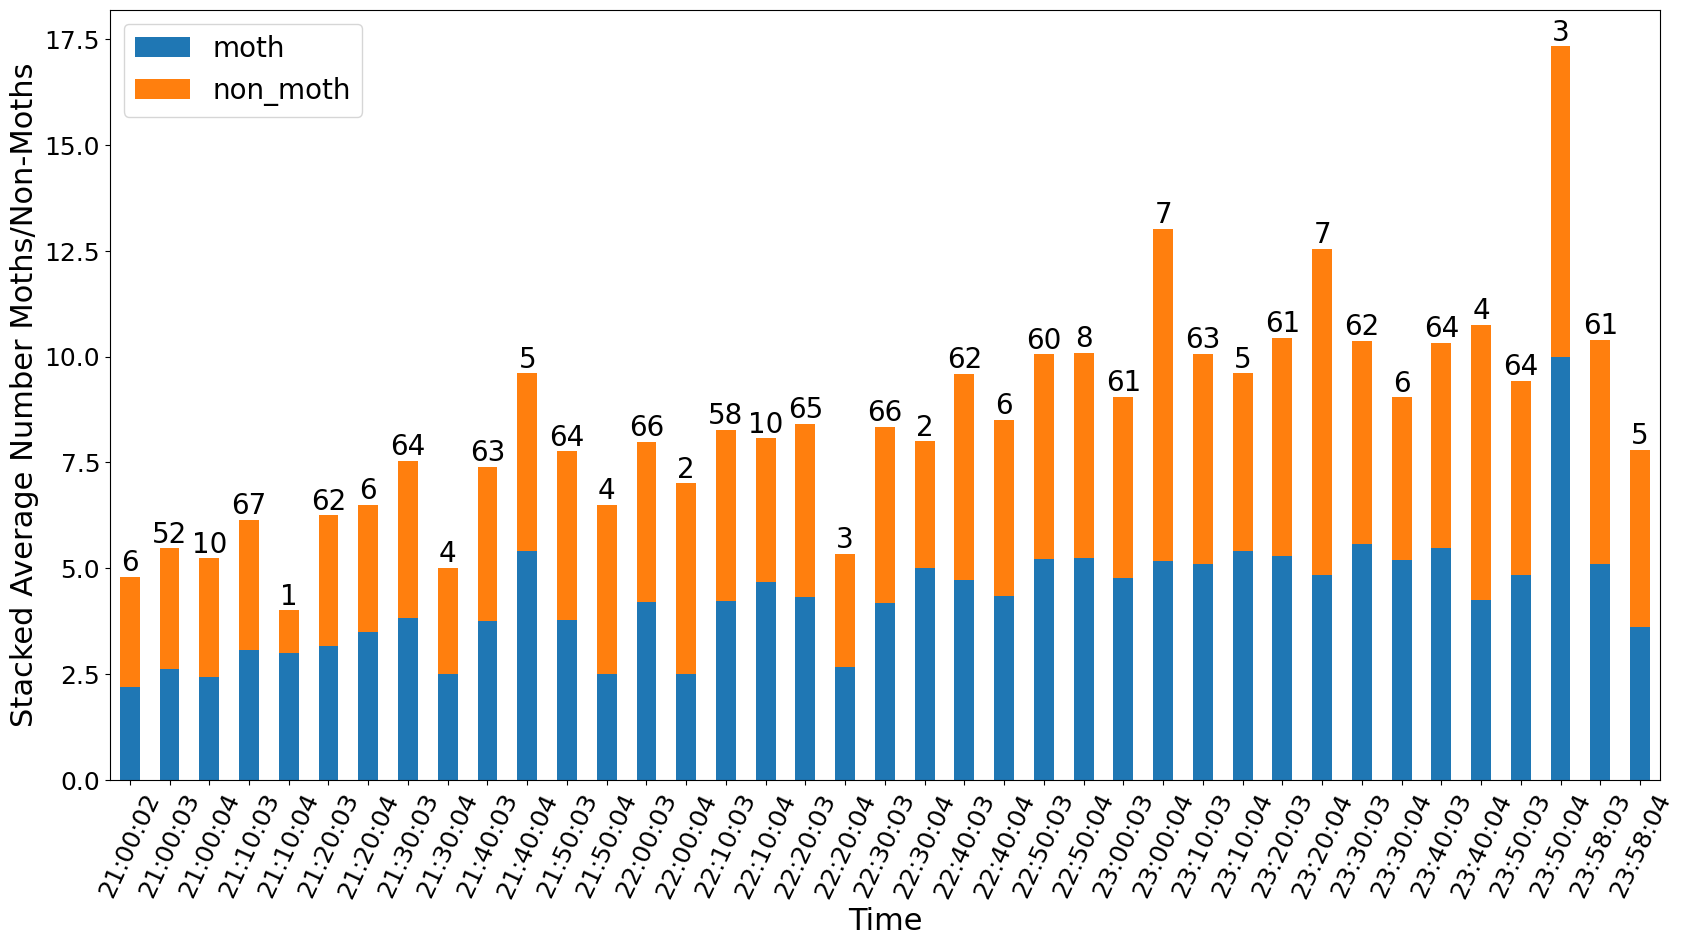

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
#stack moth at bottom
df_moth_non_moth.set_index('time').plot(kind='bar', stacked=True)
plt.xlabel('Time', size=22)
plt.xticks(rotation=65, size=18)
plt.ylabel('Stacked Average Number Moths/Non-Moths', size=22)
plt.yticks(size=18)
#change plot size
plt.gcf().set_size_inches(20, 10)
#set legend text size
plt.legend(fontsize=20)
#on top of each bar, also put # images by time_img 
for i in range(len(time_counts)):
    plt.text(i, df_moth_non_moth['moth'][i] + df_moth_non_moth['non_moth'][i],
             str(time_counts_img['counts'][i]), ha='center', va='bottom', fontsize=20)
    #plt.text(i, time_counts['counts'][i], str(time_counts_img['counts'][i]), ha='center', fontsize=20)


Text(0.5, 1.0, 'Average Moth Detections per Time')

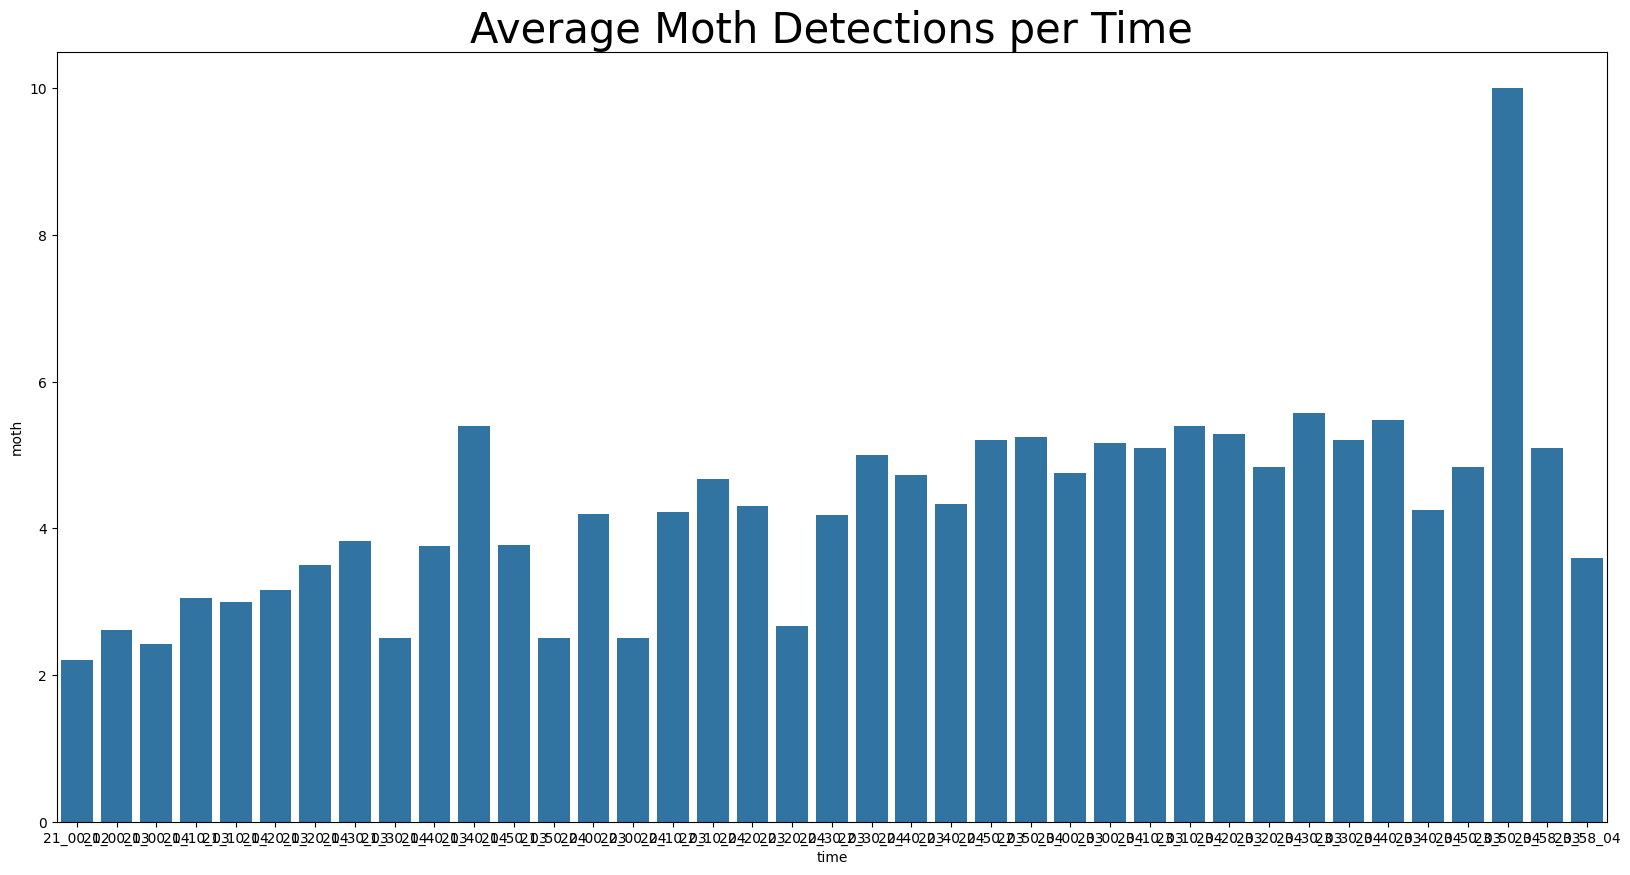

In [91]:
#plot just moth counts by time from df_moth
plt.figure(figsize=(20,10))
sns.barplot(x='time', y='moth', data=df_moth)
plt.title('Average Moth Detections per Time', size=30)

In [94]:
#return time with max moth counts in df_moth
df_moth_max = df_moth.loc[df_moth['moth'].idxmax()]
max_moth = df_moth_max['time']

In [96]:
df_moth

,time,moth
0,21_00_02,2.200000
1,21_00_03,2.612245
2,21_00_04,2.428571
3,21_10_03,3.052632
4,21_10_04,3.000000
5,21_20_03,3.160714
6,21_20_04,3.500000
7,21_30_03,3.830508
8,21_30_04,2.500000
9,21_40_03,3.754386
